<h1 style="color:#F14925";><big>Spaceship Titanic</big></h1>

This competition is one of the most popular introductory challenges on [Kaggle website](https://www.kaggle.com/competitions/spaceship-titanic) and is designed to help participants learn the basics of data analysis, data visualization, and machine learning.


    
## Competition Description

The task is relatively simple: you are required to use machine learning to create a model that predicts whether passengers were transported to an alternate dimension. Utilizing the patterns found in the `train.csv` data, your goal is to predict the value of the 'Transported' feature for the passengers in the test dataset.

## Objective

The main objective of this competition is to predict whether a passenger survived or not, which is a binary classification problem, based on the provided features. Our task is to accurately identifies which passengers were transported to the alternate dimension by the spacetime anomaly based on the available dataset. 

---
**Submission Score: 0.75075**

**Leaderboard position: 2095/2504**

**Top: 84%**

---

# Prepare the data


## File and Data Field Descriptions

#### train.csv:
    personal records for about two-thirds (~8700) of the passengers, to be used as training data

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
8. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. **Name** - The first and last names of the passenger.
10. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

#### test.csv: 
    Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

#### sample_submission.csv: A submission file in the correct format.
    PassengerId - Id for each passenger in the test set.
    Transported - The target. For each passenger, predict either True or False.

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Inspect data

In [2]:
## Loading training and test dataframe
train_df = pd.read_csv('train.csv', sep=',', header='infer')
test_df  = pd.read_csv('test.csv', sep=',', header='infer')

In [3]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Checking for empty values

In [5]:
print('\Train data porcentange of empty values:')
print(round(train_df.isnull().sum()/len(train_df)*100,2))
print('\nTest data porcentange of empty values:')
print(round(test_df.isnull().sum()/len(test_df)*100,2))

\Train data porcentange of empty values:
PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

Test data porcentange of empty values:
PassengerId     0.00
HomePlanet      2.03
CryoSleep       2.17
Cabin           2.34
Destination     2.15
Age             2.13
VIP             2.17
RoomService     1.92
FoodCourt       2.48
ShoppingMall    2.29
Spa             2.36
VRDeck          1.87
Name            2.20
dtype: float64


## Filling missing values and encoding data

### PassengerId

    
    description:

* **Passenger ID:** A unique identifier for each passenger, following the format "gggg_pp," where "gggg" denotes the group the passenger is traveling with, and "pp" represents their number within that group.

* **Grouping:** Groups can consist of family members traveling together, friends, or acquaintances who decided to journey together. However, it is essential to note that not all individuals within a group might be directly related.

    - There are no missing values.
    
    - We are going to create a new column that represents the number of passenger in each group.
    
        This coulum will say if the passenger is alone (value = 0) or in a group (value = 1)

In [6]:
temp = np.copy(train_df['PassengerId'])
temp = np.array(temp,dtype=str)

## Get all the groups ids:
temp_groupid = []
for idgroup in temp:
    splitid = idgroup.split('_')
    temp_groupid.append(splitid[0])

## Count the number of member in each group:
temp_groupid = np.array(temp_groupid,dtype=str)
groupsize = np.zeros(len(temp))
for groupid in np.unique(temp_groupid):
    mask = temp_groupid == groupid
    lengroup = len(temp_groupid[mask])
    if lengroup < 3:
        groupsize[mask] = lengroup
    else:
        groupsize[mask] = 4
    #groupsize[mask] = lengroup
    
try:
    train_df.insert(1,'GroupSize',np.array(groupsize,dtype = int))
except:
    train_df['GroupSize'] = groupsize

Correlation coefficient:  0.114352377386882


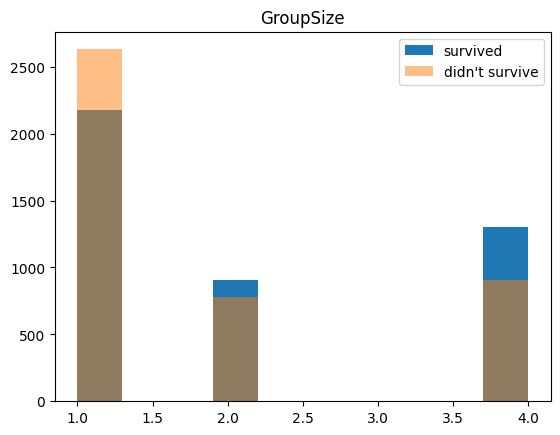

In [7]:
## Check correltion
plt.title('GroupSize')
surv = train_df['Transported']==1
histo = plt.hist(train_df['GroupSize'][surv],label='survived')
plt.hist(train_df['GroupSize'][~surv],alpha=0.5,label="didn't survive")
plt.legend()

print('Correlation coefficient: ',train_df['Transported'].corr(train_df['GroupSize']))

We observe that passengers who were traveling alone were more likely not to survive.

In [8]:
## Apply the same logic for test_data

temp = np.copy(test_df['PassengerId'])
temp = np.array(temp,dtype=str)
temp_groupid = []
for idgroup in temp:
    splitid = idgroup.split('_')
    temp_groupid.append(splitid[0])

temp_groupid = np.array(temp_groupid,dtype=str)
groupsize = np.zeros(len(temp))
for groupid in np.unique(temp_groupid):
    mask = temp_groupid == groupid
    lengroup = len(temp_groupid[mask])
    if lengroup < 3:
        groupsize[mask] = lengroup
    else:
        groupsize[mask] = 4

try:
    test_df.insert(1,'GroupSize',np.array(groupsize,dtype = int))
except:
    test_df['GroupSize'] = groupsize

### Cabin

The cabin number indicates the location where the passenger is staying and follows the format deck/num/side, where side can be either P for Port or S for Starboard.

* We will fill missing values with the most frequent value.
* Let's separate the cabin format into three new columns based on deck/num/side.

In [9]:
## Seperate the Cabin format in to [Deck, number, side]
temp =[]
i=0
for elm in train_df['Cabin']:
    code = [0,0,0]
    if pd.isnull(elm):
        code = [np.nan,np.nan,np.nan]
        i+=1
    else:
        cabin = elm.split('/')

        code[2] = 0 if cabin[2] == 'S' else 1
        code[1] = int(cabin[1])
        code[0] = 0 if  ord(cabin[0])-64 < 5 else 1
        
    temp.append(code)

## Fill empty value with the most frequent value:
fill_empty = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

## Create three new columns by splitting the "Cabin" column
try:
    train_df.insert(5,'Cabin_deck',np.array(temp[:,0],dtype = int))
    train_df.insert(6,'Cabin_num',np.array(temp[:,1],dtype = int))
    train_df.insert(7,'Cabin_port',np.array(temp[:,2],dtype = int))
except:
    train_df['Cabin_deck'] = np.array(temp[:,0],dtype = int)
    train_df['Cabin_num'] = np.array(temp[:,1],dtype = int)
    train_df['Cabin_port'] = np.array(temp[:,2],dtype = int)

In [10]:
## Binning cabim number
temp = np.copy(train_df['Cabin_num'])
cabin_bin = [300,800,2000]

for i,cabin in enumerate(temp):
    if cabin <cabin_bin[0]:
        temp[i] = 0
    elif cabin <cabin_bin[1]:
        temp[i] = 1
    else:
        temp[i] = 2
train_df['Cabin_num'] = temp

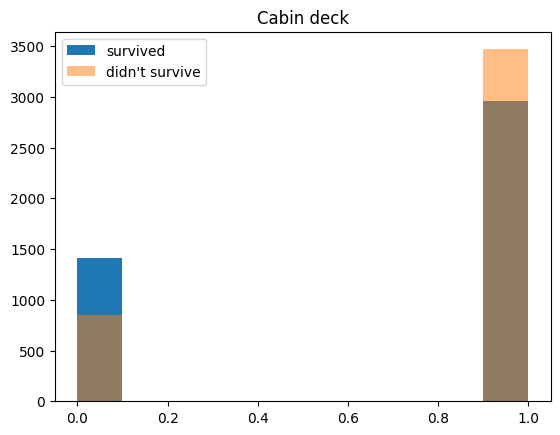

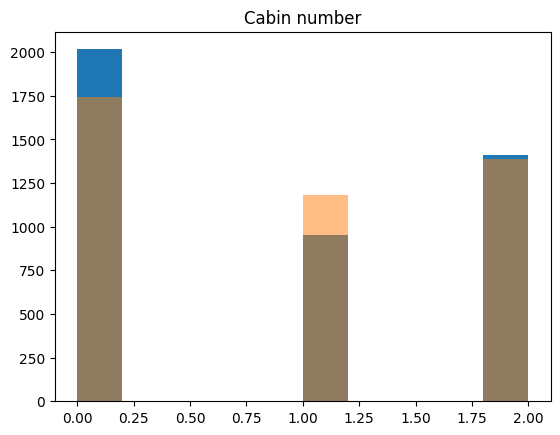

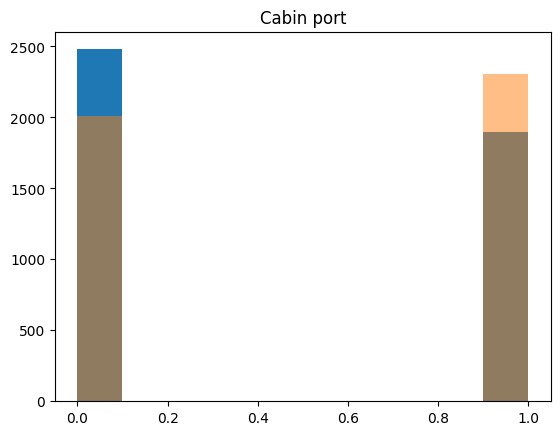

Correlation coefficient for Deck:  -0.14467431708763717
Correlation coefficient for Cabin number:  -0.03245357001742114
Correlation coefficient for Cabin port:  -0.10139736578441778


In [11]:
surv = train_df['Transported']==1

plt.figure()
plt.title('Cabin deck')
histo = plt.hist(train_df['Cabin_deck'][surv],label='survived')
plt.hist(train_df['Cabin_deck'][~surv],alpha=0.5,label="didn't survive")
plt.legend()

plt.show()
plt.figure()
plt.title('Cabin number')
histo = plt.hist(train_df['Cabin_num'][surv],label='survived')
plt.hist(train_df['Cabin_num'][~surv],alpha=0.5,label="didn't survive")
plt.show()


plt.figure()
plt.title('Cabin port')
histo = plt.hist(train_df['Cabin_port'][surv],label='survived')
plt.hist(train_df['Cabin_port'][~surv],alpha=0.5,label="didn't survive")
plt.show()

## Check Correlation coefficient:
print('Correlation coefficient for Deck: ',train_df['Transported'].corr(train_df['Cabin_deck']))
print('Correlation coefficient for Cabin number: ',train_df['Transported'].corr(train_df['Cabin_num']))
print('Correlation coefficient for Cabin port: ',train_df['Transported'].corr(train_df['Cabin_port']))

In [12]:
temp =[]
i=0
for elm in test_df['Cabin']:
    code = [0,0,0]
    if pd.isnull(elm):
        code = [np.nan,np.nan,np.nan]
        i+=1
    else:
        cabin = elm.split('/')

        code[2] = 0 if cabin[2] == 'S' else 1
        code[1] = int(cabin[1])
        code[0] = 0 if ord(cabin[0])-64 <= 4 else 1
        
    temp.append(code)


fill_empty = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
fill_empty.fit(temp)
temp = fill_empty.transform(temp)


test_df.insert(5,'Cabin_deck',np.array(temp[:,0],dtype = int))
test_df.insert(6,'Cabin_num',np.array(temp[:,1],dtype = int))
test_df.insert(7,'Cabin_port',np.array(temp[:,2],dtype = int))

## Binning cabim number
temp = np.copy(test_df['Cabin_num'])

for i,cabin in enumerate(temp):
    if cabin <cabin_bin[0]:
        temp[i] = 0
    elif cabin <cabin_bin[1]:
        temp[i] = 1
    else:
        temp[i] = 2
test_df['Cabin_num'] = temp

We observe a stronger correlation between Deck, Cabin number, and port with survival compared to just using the raw Cabin format.

However, the cabin number shows a low correlation with survival, so we will drop it from our analysis!

### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

    Amount billed to each passenger for the usage of various luxury amenities aboard Spaceship Titanic.

* Let's combine the total amount of money spent by each passenger into a single column. We will create two categories: 1 if the passenger spent money, and 0 if the passenger didn't spend any money.

* For empty values we will assume the passegender didn't spent any money.

Correlation coefficient with total bill:  -0.481628482412707


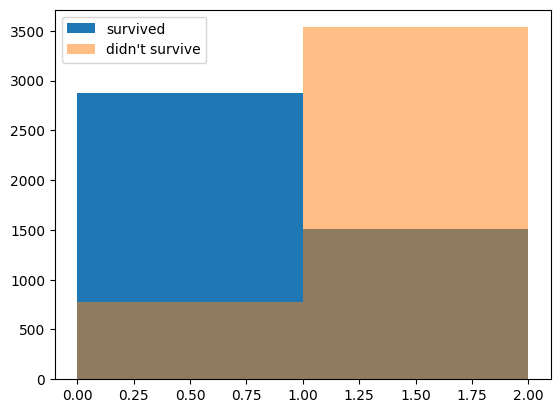

In [13]:
bills = ["RoomService",	"FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

total_bills = np.zeros(len(train_df))

for bill in bills:
    temp =np.copy(train_df[bill])
    mask = pd.isnull(temp)
    temp[mask] = 0  ### in empty set it to zero
    total_bills += temp

total_bills = [ 0 if passegenr_bill == 0 else 1 for passegenr_bill in total_bills]

try:
    train_df.insert(11,'Total_bill',np.array(total_bills,dtype = int))
except:
    train_df['Total_bill'] = total_bills



surv = train_df['Transported']==1

histo = plt.hist(train_df['Total_bill'][surv],bins=[0,1,2],label='survived')
plt.hist(train_df['Total_bill'][~surv],bins=[0,1,2],alpha=0.5,label="didn't survive")
plt.legend()
## Check Correlation coefficient:
print('Correlation coefficient with total bill: ',train_df['Transported'].corr(train_df['Total_bill']))

(array([1804.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2473.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

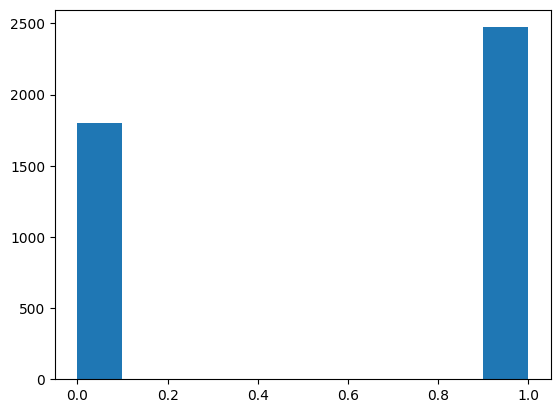

In [14]:
total_bills = np.zeros(len(test_df))

for bill in bills:
    temp =np.copy(test_df[bill])
    mask = pd.isnull(temp)
    temp[mask] = 0

    total_bills += temp

total_bills = [ 0 if bill == 0 else 1 for bill in total_bills]

try:
    test_df.insert(11,'Total_bill',np.array(total_bills,dtype = int))
except:
    test_df['Total_bill'] = total_bills
plt.hist(test_df['Total_bill'])

### Age


* Missing values will be filled using the mean of the total passenger ages.

In [15]:
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="mean")
temp = np.copy(train_df["Age"]).reshape(-1,1)
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

temp = temp.flatten()

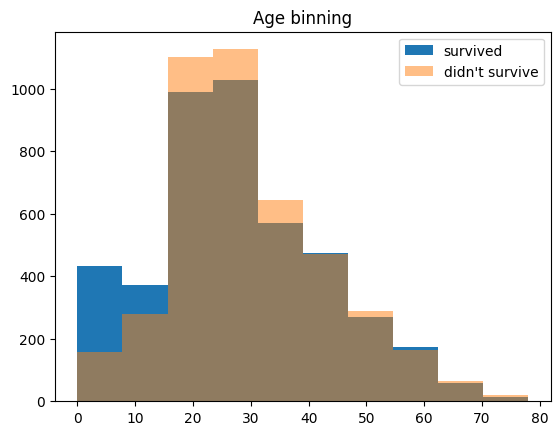

In [16]:
surv = train_df['Transported']==1

plt.title('Age binning')
histo = plt.hist(temp[surv],label='survived')
plt.hist(temp[~surv],bins = histo[1],alpha=0.5,label="didn't survive")
plt.legend()

In [17]:
print('Correlation coefficient with age: ',np.corrcoef(train_df['Transported'],temp) )

train_df['Age'] = temp

Correlation coefficient with age:  [[ 1.         -0.07424911]
 [-0.07424911  1.        ]]


In [18]:
temp = np.copy(test_df["Age"]).reshape(-1,1)
temp = fill_empty.transform(temp)
temp = temp.flatten()
test_df['Age'] = temp

### HomePlanet

* Missing values will be filled with the most frequent values.

* Passenger's Home Planet will be categorized by numbers 0 = Earth, 1 = Europa, 2 = Mars

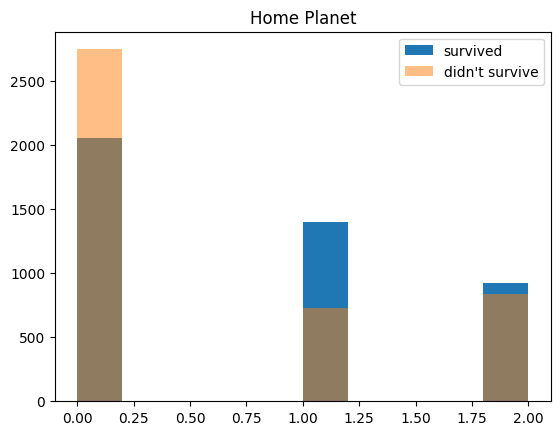

In [19]:
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
temp = np.copy(train_df["HomePlanet"]).reshape(-1,1)
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

temp = temp.flatten()

for i, planet in enumerate(np.unique(temp)):
    mask = temp == planet
    temp[mask] = i

plt.title('Home Planet')
surv = train_df['Transported']==1
histo = plt.hist(temp[surv],label='survived')
plt.hist(temp[~surv],alpha=0.5,label="didn't survive")
plt.legend()

train_df['HomePlanet'] = temp.astype(int)

In [20]:
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
temp = np.copy(test_df["HomePlanet"]).reshape(-1,1)
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

temp = temp.flatten()

for i, planet in enumerate(np.unique(temp)):
    mask = temp == planet
    temp[mask] = i
    
test_df['HomePlanet'] = temp.astype(int)

## Destination

* Missing values will be filled with the most frequent values.

* Passenger's Destination will be categorized by the final destination

Correlation coefficient with Destination:  -0.10815231966326196


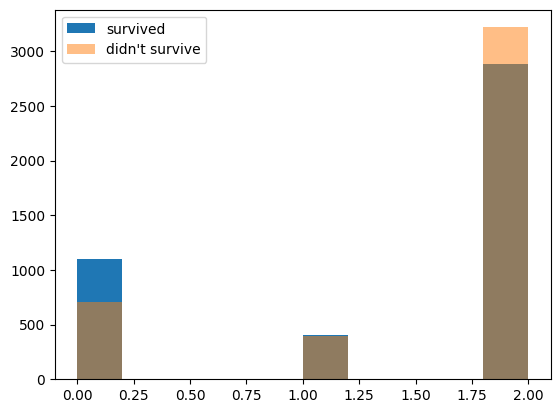

In [21]:
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
temp = np.copy(train_df["Destination"]).reshape(-1,1)
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

temp = temp.flatten()

for i, planet in enumerate(np.unique(temp)):
    mask = temp == planet
    temp[mask] = i

surv = train_df['Transported']==1
histo = plt.hist(temp[surv],label='survived')
plt.hist(temp[~surv],alpha=0.5,label="didn't survive")
plt.legend()
    
train_df['Destination'] = temp.astype(int)

print('Correlation coefficient with Destination: ',train_df['Transported'].corr(train_df['Destination']))

In [22]:
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
temp = np.copy(test_df["Destination"]).reshape(-1,1)
fill_empty.fit(temp)
temp = fill_empty.transform(temp)

temp = temp.flatten()

for i, planet in enumerate(np.unique(temp)):
    mask = temp == planet
    temp[mask] = i

test_df['Destination'] = temp.astype(int)

### CryoSleep

In [23]:
## For train_new
fill_empty = SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
for cc in ["CryoSleep"]:
    temp = np.copy(train_df[cc]).reshape(-1,1)
    fill_empty.fit(temp)
    temp = fill_empty.transform(temp)
    train_df[cc] = temp.flatten().astype(int)

## For test_new
    temp = np.copy(test_df[cc]).reshape(-1,1)
    fill_empty.fit(temp)
    temp = fill_empty.transform(temp)
    test_df[cc] = temp.flatten().astype(int)

#### Transported

    Let convert the boolean type to int

In [24]:
temp = np.copy(train_df['Transported']).astype(int)
train_df['Transported'] = temp

## New frame

    Let's remove some couloums and create a enw data frame

    We are going to remove ["PassengerId","Cabin","Cabin_num","VIP", "RoomService",	"FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name"]

In [25]:
#remove = ["PassengerId","Cabin","Cabin_num", "RoomService",	"FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP", "Name","GroupSize","HomePlanet","Cabin_deck","Cabin_port","Destination","Age"]
remove = ["PassengerId","Cabin","Cabin_num","VIP", "RoomService",	"FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name"]
train_df_new = train_df.drop(remove,axis=1)
test_df_new = test_df.drop(remove,axis=1)

In [26]:
train_df_new

,GroupSize,HomePlanet,CryoSleep,Cabin_deck,Cabin_port,Destination,Age,Total_bill,Transported
0,1,1,0,0,1,2,39.0,0,0
1,1,0,0,1,0,2,24.0,1,1
2,2,1,0,0,0,2,58.0,1,0
3,2,1,0,0,0,2,33.0,1,0
4,1,0,0,1,0,2,16.0,1,1
...,...,...,...,...,...,...,...,...,...
8688,1,1,0,0,1,0,41.0,1,0
8689,1,0,1,1,0,1,18.0,0,0
8690,1,0,0,1,0,2,26.0,1,1
8691,2,1,0,1,0,0,32.0,1,0


In [27]:
test_df_new

,GroupSize,HomePlanet,CryoSleep,Cabin_deck,Cabin_port,Destination,Age,Total_bill
0,1,0,1,1,0,2,27.00000,0
1,1,0,0,1,0,2,19.00000,1
2,1,1,1,0,0,0,31.00000,0
3,1,1,0,0,0,2,38.00000,1
4,1,0,0,1,0,2,20.00000,1
...,...,...,...,...,...,...,...,...
4272,2,0,1,1,0,2,34.00000,0
4273,1,0,0,1,0,2,42.00000,1
4274,1,2,1,0,1,0,28.82793,0
4275,1,1,0,0,1,2,28.82793,1


,GroupSize,HomePlanet,CryoSleep,Cabin_deck,Cabin_port,Destination,Age,Total_bill,Transported
GroupSize,1.000000,0.125605,0.090492,-0.171902,-0.020576,-0.034603,-0.187003,-0.212166,0.114352
HomePlanet,0.125605,1.000000,0.083586,-0.340844,-0.000636,0.034737,0.133888,-0.080063,0.115461
CryoSleep,0.090492,0.083586,1.000000,-0.052502,-0.023858,-0.096287,-0.070736,-0.860713,0.460132
Cabin_deck,-0.171902,-0.340844,-0.052502,1.000000,0.018091,0.204081,-0.216643,0.021942,-0.144674
Cabin_port,-0.020576,-0.000636,-0.023858,0.018091,1.000000,0.012979,-0.011758,0.021666,-0.101397
Destination,-0.034603,0.034737,-0.096287,0.204081,0.012979,1.000000,-0.006619,0.077988,-0.108152
Age,-0.187003,0.133888,-0.070736,-0.216643,-0.011758,-0.006619,1.000000,0.227717,-0.074249
Total_bill,-0.212166,-0.080063,-0.860713,0.021942,0.021666,0.077988,0.227717,1.000000,-0.481628
Transported,0.114352,0.115461,0.460132,-0.144674,-0.101397,-0.108152,-0.074249,-0.481628,1.000000


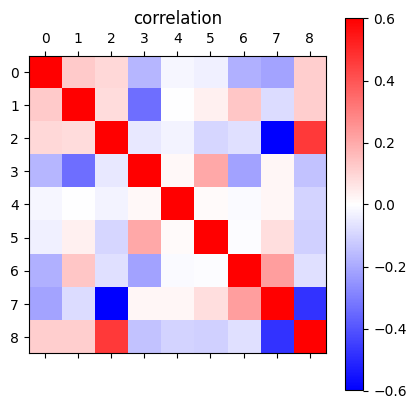

In [28]:
#let's check if there are some correlation on the data
corr=train_df_new.corr()
plt.matshow(corr,vmin=-0.6,vmax=0.6,cmap = 'bwr')
plt.colorbar()
plt.title('correlation')
corr#>0.2

### One hot encoding

In [29]:
## Create new data frame with One hot encoding
df_keys = ['GroupSize', 'HomePlanet','Destination']
for key in df_keys:
    group_size = train_df_new[key].unique()
    onehot_encdig = pd.get_dummies(train_df_new[key])
    for group in group_size:
        newlabel =key+'g'+str(group)
        train_df_new[newlabel] = onehot_encdig[group].astype(int)

In [30]:
## Create new data frame with One hot encoding
df_keys = ['GroupSize', 'HomePlanet','Destination']
for key in df_keys:
    group_size = test_df_new[key].unique()
    onehot_encdig = pd.get_dummies(test_df_new[key])
    for group in group_size:
        newlabel =key+'g'+str(group)
        test_df_new[newlabel] = onehot_encdig[group].astype(int)

In [31]:
remove = ['GroupSize', 'HomePlanet','Destination']
train_df_new.drop(remove,axis=1,inplace=True)
test_df_new.drop(remove,axis=1,inplace=True)

# shift column 'Transported' to last position
last_column = train_df_new.pop('Transported')
train_df_new['Transported'] = last_column

In [32]:
train_df_new

,CryoSleep,Cabin_deck,Cabin_port,Age,Total_bill,GroupSizeg1,GroupSizeg2,GroupSizeg4,HomePlanetg1,HomePlanetg0,HomePlanetg2,Destinationg2,Destinationg1,Destinationg0,Transported
0,0,0,1,39.0,0,1,0,0,1,0,0,1,0,0,0
1,0,1,0,24.0,1,1,0,0,0,1,0,1,0,0,1
2,0,0,0,58.0,1,0,1,0,1,0,0,1,0,0,0
3,0,0,0,33.0,1,0,1,0,1,0,0,1,0,0,0
4,0,1,0,16.0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,1,41.0,1,1,0,0,1,0,0,0,0,1,0
8689,1,1,0,18.0,0,1,0,0,0,1,0,0,1,0,0
8690,0,1,0,26.0,1,1,0,0,0,1,0,1,0,0,1
8691,0,1,0,32.0,1,0,1,0,1,0,0,0,0,1,0


In [33]:
train_df_new

,CryoSleep,Cabin_deck,Cabin_port,Age,Total_bill,GroupSizeg1,GroupSizeg2,GroupSizeg4,HomePlanetg1,HomePlanetg0,HomePlanetg2,Destinationg2,Destinationg1,Destinationg0,Transported
0,0,0,1,39.0,0,1,0,0,1,0,0,1,0,0,0
1,0,1,0,24.0,1,1,0,0,0,1,0,1,0,0,1
2,0,0,0,58.0,1,0,1,0,1,0,0,1,0,0,0
3,0,0,0,33.0,1,0,1,0,1,0,0,1,0,0,0
4,0,1,0,16.0,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,1,41.0,1,1,0,0,1,0,0,0,0,1,0
8689,1,1,0,18.0,0,1,0,0,0,1,0,0,1,0,0
8690,0,1,0,26.0,1,1,0,0,0,1,0,1,0,0,1
8691,0,1,0,32.0,1,0,1,0,1,0,0,0,0,1,0


,CryoSleep,Cabin_deck,Cabin_port,Age,Total_bill,GroupSizeg1,GroupSizeg2,GroupSizeg4,HomePlanetg1,HomePlanetg0,HomePlanetg2,Destinationg2,Destinationg1,Destinationg0,Transported
CryoSleep,1.000000,-0.052502,-0.023858,-0.070736,-0.860713,-0.091562,0.029546,0.077795,0.093395,-0.107231,0.032715,-0.113380,0.087764,0.065589,0.460132
Cabin_deck,-0.052502,1.000000,0.018091,-0.216643,0.021942,0.237995,-0.177073,-0.111185,-0.843781,0.637513,0.114439,0.132430,0.156353,-0.260864,-0.144674
Cabin_port,-0.023858,0.018091,1.000000,-0.011758,0.021666,0.026463,-0.017373,-0.014465,-0.040700,0.018114,0.021160,0.009578,0.006277,-0.015286,-0.101397
Age,-0.070736,-0.216643,-0.011758,1.000000,0.227717,0.133769,0.043623,-0.192440,0.217444,-0.201109,0.016081,0.003008,-0.028247,0.016709,-0.074249
Total_bill,-0.860713,0.021942,0.021666,0.227717,1.000000,0.185228,-0.013678,-0.199220,-0.067995,0.093428,-0.042827,0.087640,-0.057778,-0.057860,-0.481628
GroupSizeg1,-0.091562,0.237995,0.026463,0.133769,0.185228,1.000000,-0.544511,-0.648283,-0.236054,0.243895,-0.049109,0.016138,0.096275,-0.086754,-0.113792
GroupSizeg2,0.029546,-0.177073,-0.017373,0.043623,-0.013678,-0.544511,1.000000,-0.285630,0.163602,-0.179400,0.046863,-0.020808,-0.057569,0.064478,0.033725
GroupSizeg4,0.077795,-0.111185,-0.014465,-0.192440,-0.199220,-0.648283,-0.285630,1.000000,0.121196,-0.115814,0.013570,0.000451,-0.057742,0.040591,0.099401
HomePlanetg1,0.093395,-0.843781,-0.040700,0.217444,-0.067995,-0.236054,0.163602,0.121196,1.000000,-0.633221,-0.287022,-0.156958,-0.163308,0.293517,0.176916
HomePlanetg0,-0.107231,0.637513,0.018114,-0.201109,0.093428,0.243895,-0.179400,-0.115814,-0.633221,1.000000,-0.559658,-0.007418,0.231177,-0.156169,-0.168845


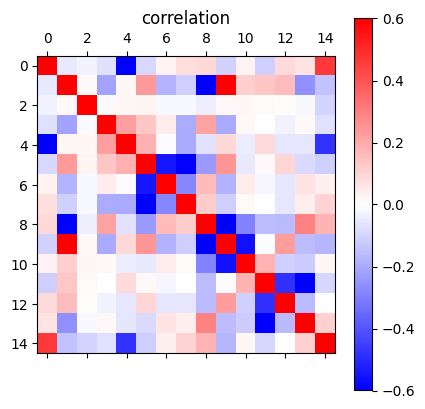

In [34]:
#let's check if there are some correlation on the data
corr=train_df_new.corr()
plt.matshow(corr,vmin=-0.6,vmax=0.6,cmap = 'bwr')
plt.colorbar()
plt.title('correlation')
corr#>0.2

### Data vector

In [35]:
Dtrain_vec = train_df_new.values
print(np.shape(Dtrain_vec))

Dtest_vec = test_df_new.values
print(np.shape(Dtest_vec))

(8693, 15)
(4277, 14)


# Trainining Model

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
print(tf.config.list_physical_devices('GPU'))

2023-07-22 19:53:32.380352: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 19:53:33.041699: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-07-22 19:53:33.791143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:33.825696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:33.825838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [37]:
def model_spacetitanic():
    
    model = keras.Sequential()

    model.add(keras.Input(shape=(14,)))  ## argument must be the shape of each sample, not the shape of one batch.
    model.add(layers.Dense(128, activation="relu",kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=1922),kernel_regularizer=regularizers.L2(l2=0.02)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation="relu",kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=1832),kernel_regularizer=regularizers.L2(l2=0.02)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation="relu",kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=5234),kernel_regularizer=regularizers.L2(l2=0.02)))
    model.add(layers.Dense(1, activation="sigmoid"))

    # then we build the model
    model.build()

    # Compile
    optimizer=keras.optimizers.RMSprop(1e-4)
    model.compile(optimizer=optimizer,#optimizer = "adam",#optimizer="rmsprop",   #good for default, generally good for any problem
    loss="binary_crossentropy",        # usually good when working with output probabilities 
    metrics=["accuracy"])
    
    return model

print(model_spacetitanic().summary())

# Training
model = model_spacetitanic()
history = model.fit(Dtrain_vec[:,:-1],Dtrain_vec[:,-1],epochs=1000,batch_size=512,validation_split=0.5,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-traina

2023-07-22 19:53:33.840202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:33.840298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:33.840335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:34.536573: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-22 19:53:34.536650: I tensorflow/compile

None
Epoch 1/1000


2023-07-22 19:53:36.380895: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-22 19:53:36.387418: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f42b001aac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-22 19:53:36.387454: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-07-22 19:53:36.394164: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-22 19:53:36.569846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-22 19:53:36.677479: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-22 19:

9/9 [==============================] - 3s 30ms/step - loss: 1.2920 - accuracy: 0.4756 - val_loss: 1.2694 - val_accuracy: 0.5040
Epoch 2/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.2646 - accuracy: 0.4906 - val_loss: 1.2528 - val_accuracy: 0.4829
Epoch 3/1000
9/9 [==============================] - 0s 11ms/step - loss: 1.2479 - accuracy: 0.5007 - val_loss: 1.2383 - val_accuracy: 0.4806
Epoch 4/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.2324 - accuracy: 0.5182 - val_loss: 1.2245 - val_accuracy: 0.4803
Epoch 5/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.2206 - accuracy: 0.4972 - val_loss: 1.2107 - val_accuracy: 0.4803
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.2049 - accuracy: 0.5090 - val_loss: 1.1974 - val_accuracy: 0.4803
Epoch 7/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.1920 - accuracy: 0.5161 - val_loss: 1.1842 - val_accuracy: 0.4803
Epoch 8/1000
9/9 [========

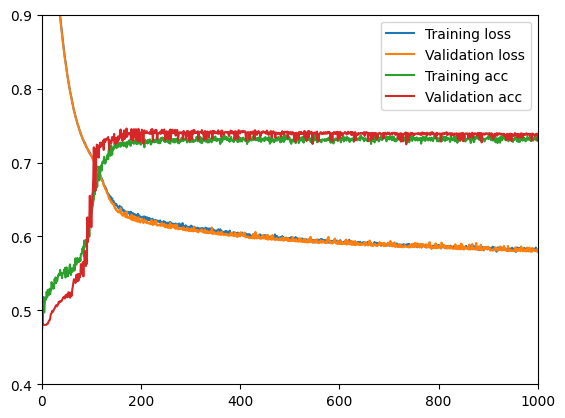

In [38]:
history_dict = history.history
history_dict.keys()


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1,len(loss_values)+1)

plt.plot(epochs,loss_values,label="Training loss")
plt.plot(epochs,val_loss_values,label="Validation loss")


acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")
plt.ylim(0.4,0.9)
plt.xlim(0,1000)
plt.legend()

In [39]:
predictions= model.predict(Dtest_vec)

134/134 [==============================] - 0s 2ms/step


(array([5.82885191, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.17114701]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

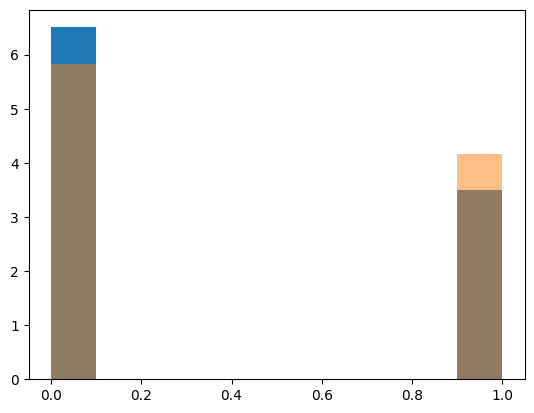

In [40]:
plt.hist(Dtrain_vec[:,0],density=True)
plt.hist(np.round(predictions),density=True,alpha=0.5)


# Summit Results

In [41]:
#######
#######
# preparing validation and training data set
model = model_spacetitanic()
# Training
history = model.fit(Dtrain_vec[:,:-1],Dtrain_vec[:,-1],epochs=1000,batch_size=512,shuffle=True)
#######
#######

Epoch 1/1000
17/17 [==============================] - 1s 7ms/step - loss: 1.2755 - accuracy: 0.5158
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.2447 - accuracy: 0.5125
Epoch 3/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.2188 - accuracy: 0.5212
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.1926 - accuracy: 0.5270
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.1717 - accuracy: 0.5137
Epoch 6/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.1460 - accuracy: 0.5348
Epoch 7/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.1239 - accuracy: 0.5316
Epoch 8/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.1041 - accuracy: 0.5267
Epoch 9/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.0828 - accuracy: 0.5178
Epoch 10/1000
17/17 [==============================] - 0s 7ms/step - loss: 1.0620 - accuracy: 0.5416

Text(0.5, 1.0, 'accuaracy')

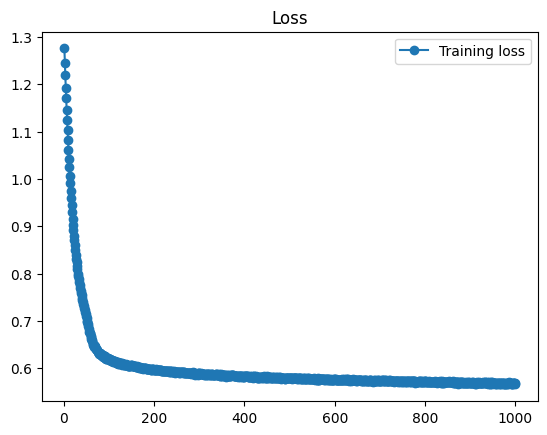

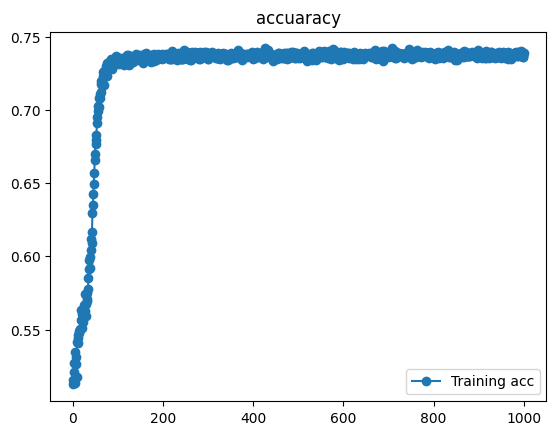

In [42]:
history_dict = history.history


plt.figure()
loss_values = history_dict['loss']
epochs = np.arange(1,len(loss_values)+1)

plt.plot(epochs,loss_values,"o-",label="Training loss")
plt.legend()
plt.title("Loss")


plt.figure()
acc = history_dict["accuracy"]
plt.plot(epochs, acc, "o-", label="Training acc")
plt.legend()
plt.title("accuaracy")

134/134 [==============================] - 0s 1ms/step


(array([5.82885191, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.17114701]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

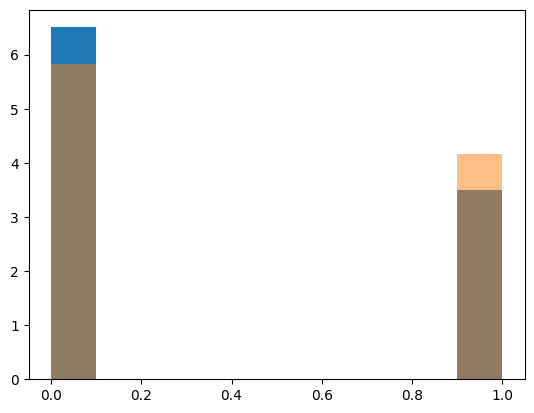

In [43]:
predictions= np.round(model.predict(Dtest_vec))
plt.hist(Dtrain_vec[:,0],density=True)
plt.hist(predictions,density=True,alpha=0.5)

In [44]:
sub_df  = pd.read_csv('test.csv', sep=',', header='infer')

my_prediction = pd.DataFrame()
my_prediction['PassengerId']=np.copy(sub_df['PassengerId'])
my_prediction['Transported']=predictions.astype(bool)

my_prediction.to_csv('my_prediction.csv',sep=',',index=False)